In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import fileinput
import decimal

In [2]:
def range_decimal(start, stop, step, stop_inclusive=False):
    """ The Python range() function, using decimals.  A decimal loop_value generator.

    Note: The decimal math (addition) defines the rounding.

    If the stop is None, then:
        stop = start
        start = 0 (zero)

    If the step is 0 (zero) or None, then:
        if (stop < start) then step = -1 (minus one)
        if (stop >= start) then step = 1 (one)

    Example:
        for index in range_decimal(0, 1.0, '.1', stop_inclusive=True):
            print(index)

    :param start: The loop start value
    :param stop: The loop stop value
    :param step: The loop step value
    :param stop_inclusive: Include the stop value in the loop's yield generator: False = excluded ; True = included
    :return: The loop generator's yield increment value (decimal)
    """
    try:
        # Input argument(s) error check
        zero = decimal.Decimal('0')

        if start is None:
            start = zero

        if not isinstance(start, decimal.Decimal):
            start = decimal.Decimal(f'{start}')

        if stop is None:
            stop = start
            start = zero

        if not isinstance(stop, decimal.Decimal):
            stop = decimal.Decimal(f'{stop}')

        if step is None:
            step = decimal.Decimal('-1' if stop < start else '1')

        if not isinstance(step, decimal.Decimal):
            step = decimal.Decimal(f'{step}')

        if step == zero:
            step = decimal.Decimal('-1' if stop < start else '1')

        # Check for valid loop conditions
        if start == stop or (start < stop
                             and step < zero) or (start > stop
                                                  and step > zero):
            return  # Not valid: no loop

        # Case: increment step ( > 0 )
        if step > zero:
            while start < stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Case: decrement step ( < 0 )
        else:
            while start > stop:  # Yield the decimal loop points (stop value excluded)
                yield start
                start += step

        # Yield the stop value (inclusive)
        if stop_inclusive:
            yield stop

    except (ValueError, decimal.DecimalException) as ex:
        raise ValueError(f'{__name__}.range_decimal() error: {ex}')

In [3]:
def plot_max(max_erg, max_ene, max_pow, title, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(max_erg[:,0], max_erg[:,1], '-r', label='$\epsilon_{max}$')
    ax.plot(max_ene[:,0], max_ene[:,1], '-b', label='$E_{max}$')
    ax.plot(max_pow[:,0], max_pow[:,1], '-m', label='$P_{max}$')
    
    ax.set_xlim(max_erg[:,0][0],max_erg[:,0][-1])
    ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
    ax.set_ylim(0)
    
    ax.set_title('Input pulse state: ' + title)
    ax.legend()
    
    return ax

In [4]:
source_dir = "../../outputs/gaussian/max/"

max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/power*.dat"))))

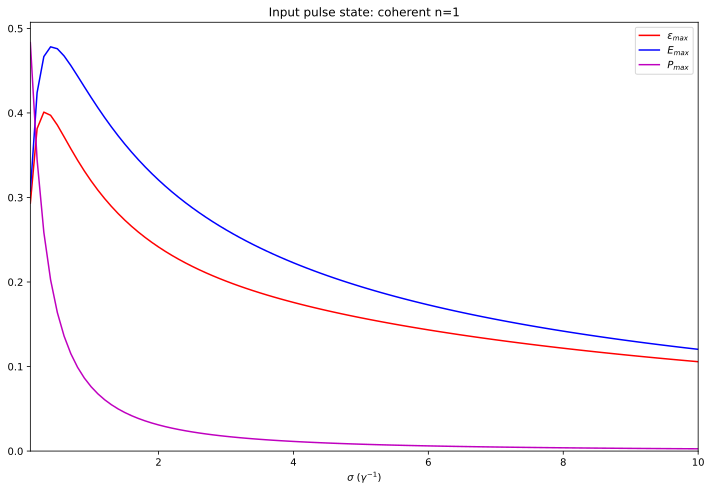

In [5]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_erg=max_erg_coherent, max_ene=max_ene_coherent, max_pow=max_pow_coherent, 
         title='coherent n=1', ax=axes)

plt.tight_layout()
plt.show()

In [6]:
source_dir = "../../outputs/gaussian/max/"

max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.0005/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.0005/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.0005/power*.dat"))))

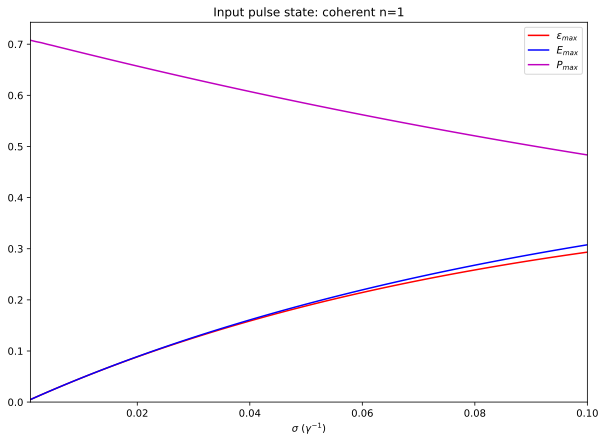

In [7]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_erg_coherent, max_ene_coherent, max_pow_coherent, title='coherent n=1', ax=axes)

plt.show()

In [8]:
source_dir = "../../outputs/gaussian/max/"

max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_1e-05/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_1e-05/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_1e-05/power*.dat"))))

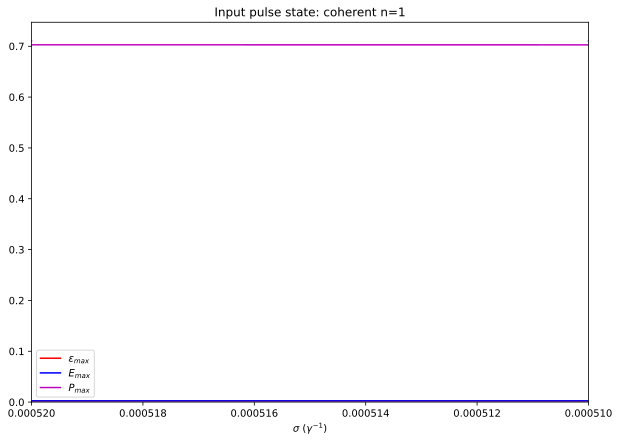

In [9]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_erg_coherent, max_ene_coherent, max_pow_coherent, title='coherent n=1', ax=axes)

plt.show()

In [10]:
source_dir = "../../outputs/gaussian/max/"

max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/big_sigma/ergotropy*.dat"))))
max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/big_sigma/energy*.dat"))))
max_pow_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + "coherent_1/precision_0.001/big_sigma/power*.dat"))))

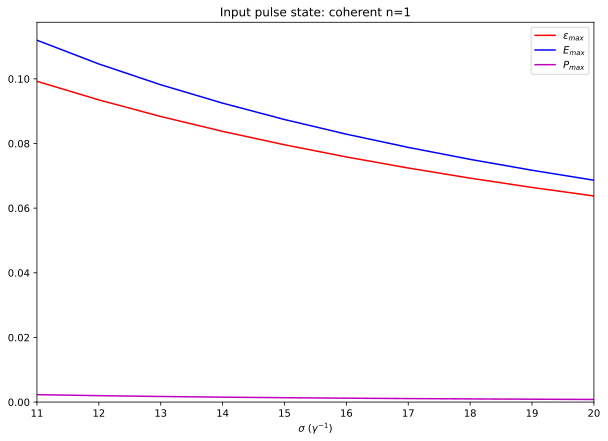

In [11]:
fig, axes = plt.subplots(1,figsize=(10, 7))

plot_max(max_erg_coherent, max_ene_coherent, max_pow_coherent, title='coherent n=1', ax=axes)

plt.show()

1.2043327656266412


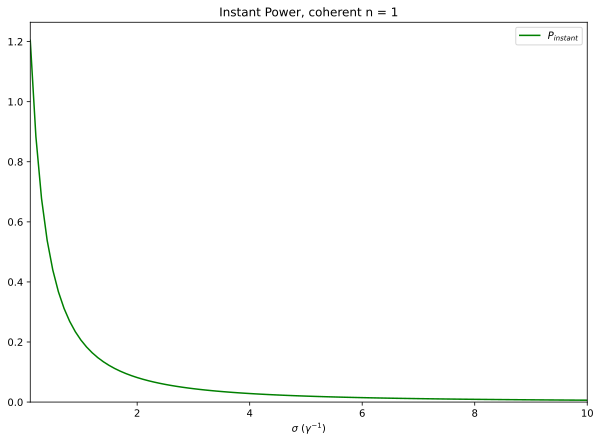

In [12]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
    
sig_l, instant_pow = [], []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_1/precision_0.001/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
    
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow.append(np.gradient(erg[:,1], dt).max())

print(instant_pow[0])
ax.plot(sig_l, instant_pow, '-g', label='$P_{instant}$')
ax.set_xlim(sig_l[0], sig_l[-1])
ax.set_ylim(0)
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Instant Power, coherent n = 1')
ax.legend()

plt.show()

1.2042013088138337
1.6492490735919947


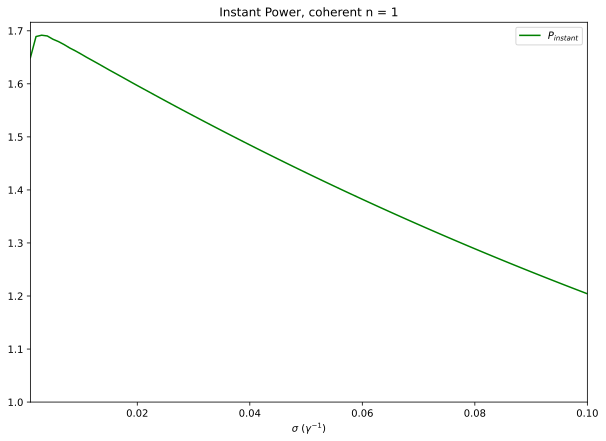

In [13]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
    
sig_l, instant_pow = [], []
for sigma in range_decimal(0.001,0.1,0.001,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_1/precision_0.0005/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
    
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow.append(np.gradient(erg[:,1], dt).max())

print(instant_pow[-1])
print(instant_pow[0])
ax.plot(sig_l, instant_pow, '-g', label='$P_{instant}$')
ax.set_xlim(sig_l[0], sig_l[-1])
ax.set_ylim(1)
#ax.hlines(1.7034852757735723,sig_l[0],sig_l[-1])
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Instant Power, coherent n = 1')
ax.legend()

plt.show()

1.713814140391208


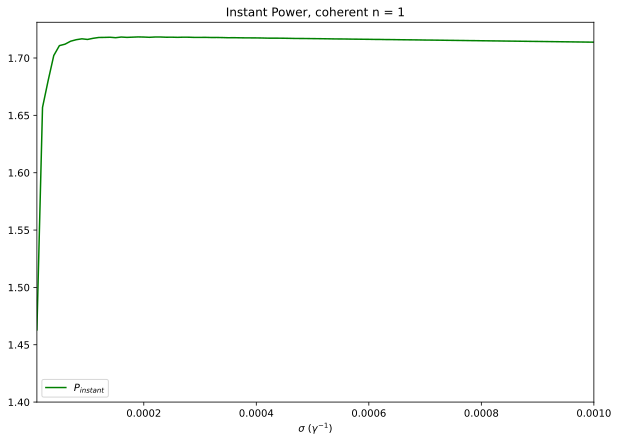

In [14]:
source_dir = "../../outputs/gaussian/fixed_sigma/"

fig, ax = plt.subplots(figsize=(10,7))
#fig.set_figheight(7)
#fig.set_figwidth(10)
    
sig_l, instant_pow = [], []
for sigma in range_decimal(0.00001,0.001,0.00001,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_1/precision_1e-05/sigma_"+str(sigma)+
                     "/ergotropy_"+str(sigma)+".dat")
    sig_l.append(float(sigma))
    
    # Calculate the numerical derivative
    # np.gradient uses the central slope, so it is more precise
    dt = erg[:,0][-1] - erg[:,0][-2]
    instant_pow.append(np.gradient(erg[:,1], dt).max())
print(instant_pow[-1])
ax.plot(sig_l, instant_pow, '-g', label='$P_{instant}$')
ax.set_xlim(sig_l[0], sig_l[-1])
ax.set_ylim(1.4)
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_title('Instant Power, coherent n = 1')
ax.legend()

plt.show()

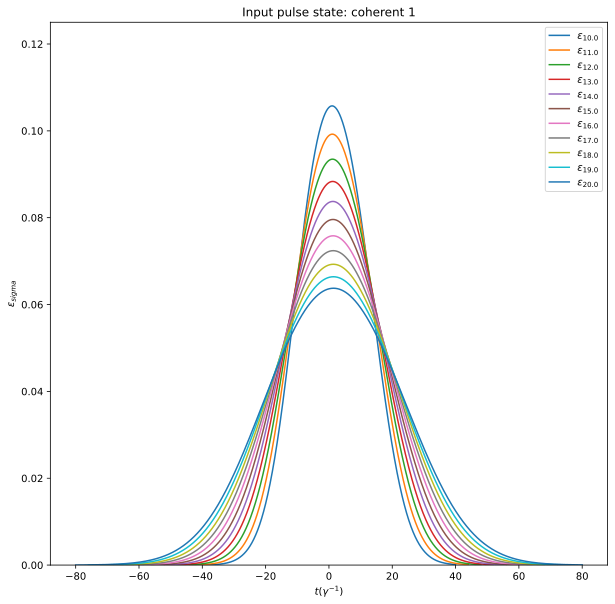

In [15]:
source_dir = "../../outputs/gaussian/fixed_sigma/"
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(10.0,20.0,1.0,stop_inclusive=True):
    erg = np.loadtxt(source_dir+"coherent_1/precision_0.001/sigma_"+str(sigma)+
                "/ergotropy_"+str(sigma)+".dat")
    axes.plot(erg[:,0],erg[:,1], label='$\epsilon_{'+str(sigma)+'}$')
    axes.set_ylim(0,0.125)
    axes.set_xlabel('$t(\gamma^{-1})$')
    axes.set_ylabel('$\epsilon_{sigma}$')
    #axes.set_xlim(-0.5,3)
    axes.set_title("Input pulse state: coherent 1")
    axes.legend()

#plt.tight_layout()
plt.show()

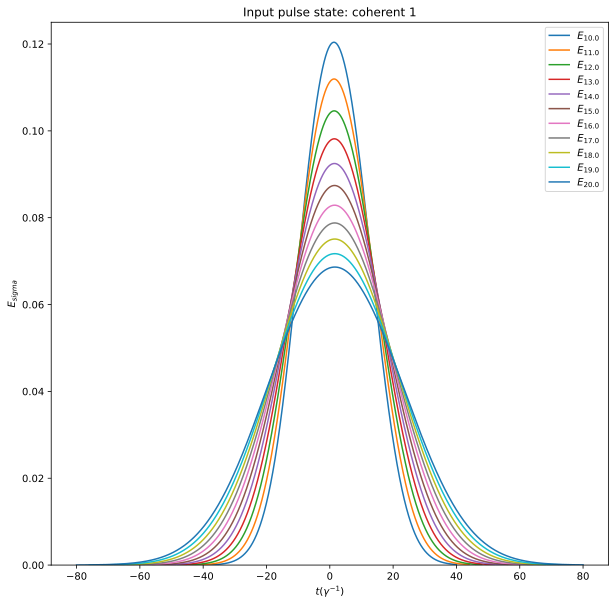

In [16]:
source_dir = "../../outputs/gaussian/fixed_sigma/"
fig, axes = plt.subplots(figsize=(10, 10))

for sigma in range_decimal(10.0,20.0,1.0,stop_inclusive=True):
    ene = np.loadtxt(source_dir+"coherent_1/precision_0.001/sigma_"+str(sigma)+
                "/energy_"+str(sigma)+".dat")
    axes.plot(ene[:,0],ene[:,1], label='$E_{'+str(sigma)+'}$')
    axes.set_ylim(0,0.125)
    axes.set_xlabel('$t(\gamma^{-1})$')
    axes.set_ylabel('$E_{sigma}$')
    #axes.set_xlim(-0.5,3)
    axes.set_title("Input pulse state: coherent 1")
    axes.legend()

#plt.tight_layout()
plt.show()

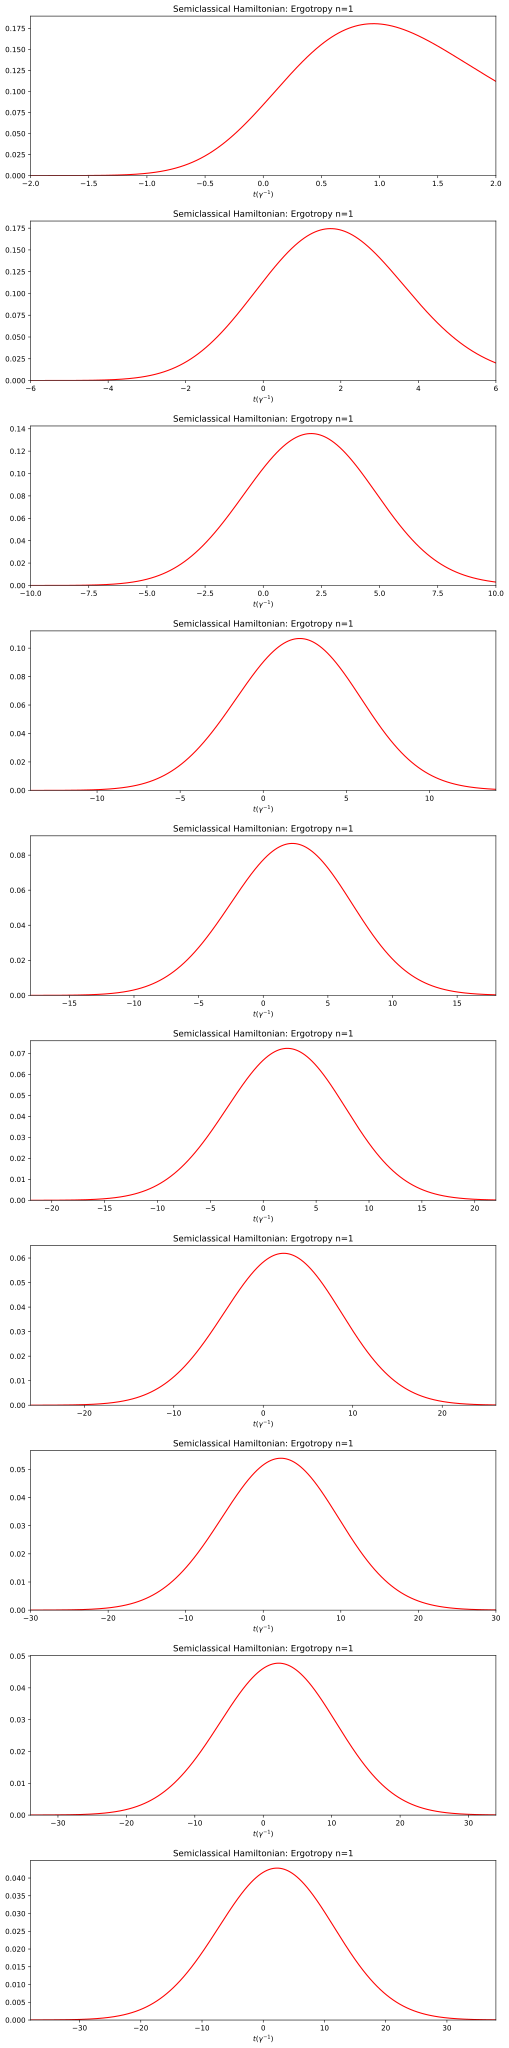

In [20]:
source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/1/"
fig, axes = plt.subplots(10,figsize=(10, 40))

for sigma, ax in zip(range_decimal(0.5,9.5,1.0,stop_inclusive=True), axes):
    erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/ergotropy.dat")
    
    ax.plot(erg[:,0],erg[:,1], '-r')
    
    ax.set_xlabel('$t(\gamma^{-1})$')
    ax.set_ylim(0)
    ax.set_xlim(erg[:,0][0], erg[:,0][-1])
    
    ax.set_title('Semiclassical Hamiltonian: Ergotropy n=1')

plt.tight_layout()
plt.show()

In [32]:
source_dir = "../../outputs/gaussian/max/"

max_erg_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + 
                                                               "coherent_1/precision_0.001/ergotropy*.dat"))))

source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/1/"

sig_list, max_erg_sc = [], []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    sig_list.append(float(sigma))
    erg = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/ergotropy.dat")
    max_erg_sc.append(erg[:,1].max())

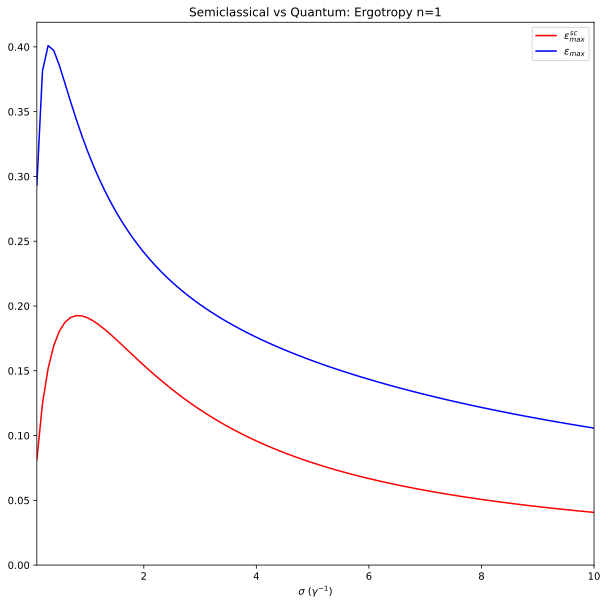

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(sig_list, max_erg_sc, '-r', label='$\epsilon_{max}^{sc}$')
ax.plot(max_erg_coherent[:,0],max_erg_coherent[:,1], '-b', label='$\epsilon_{max}$')

ax.set_xlim(sig_list[0],sig_list[-1])
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_ylim(0)

ax.set_title("Semiclassical vs Quantum: Ergotropy n=1")

ax.legend()
plt.show()

In [36]:
source_dir = "../../outputs/gaussian/max/"

max_ene_coherent = np.loadtxt(fileinput.input(sorted(glob.glob(source_dir + 
                                                               "coherent_1/precision_0.001/energy*.dat"))))

source_dir = "../../outputs/gaussian/fixed_sigma/coherent_semiclassical/1/"

sig_list, max_ene_sc = [], []
for sigma in range_decimal(0.1,10.0,0.1,stop_inclusive=True):
    sig_list.append(float(sigma))
    ene = np.loadtxt(source_dir+"sigma_"+str(sigma)+"/precision_0.001/energy.dat")
    max_ene_sc.append(ene[:,1].max())

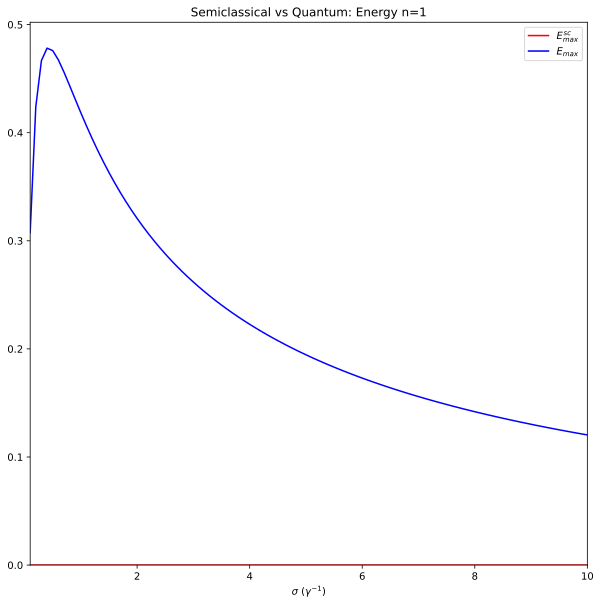

In [40]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(sig_list, max_ene_sc, '-r', label='$E_{max}^{sc}$')
ax.plot(max_ene_coherent[:,0],max_ene_coherent[:,1], '-b', label='$E_{max}$')

ax.set_xlim(sig_list[0],sig_list[-1])
ax.set_xlabel('$\sigma$ ($\gamma^{-1}$)')
ax.set_ylim(0)

ax.set_title("Semiclassical vs Quantum: Energy n=1")

ax.legend()
plt.show()